**Ejemplo:** Equilibrio de Hardy-Weinberg en un locus con dos alelos

Imagina que tomas una muestra de 100 individuos de una población de una especie $X_1$, para analizar un locus con dos alelos A y a.

Al realizar las pruebas para identificar los genotipos, obtienes el siguiente conteo:

Genotipos observados:

AA = 45

Aa = 40

aa = 15

Para comprobar si esta población se encuentra en equilibrio de H-W decides analizar tus datos utilizando R:

In [2]:
# Paso 1: Datos observados
obs_counts <- c(AA = 45, Aa = 40, aa = 15)
obs_counts

n <- sum(obs_counts)

AA Aa aa 
45 40 15

In [3]:
# Paso 2: Calcular frecuencias alélicas
p <- (2*obs_counts["AA"] + obs_counts["Aa"]) / (2*n)  # frecuencia A
q <- 1 - p                                            # frecuencia a

cat("\nFrecuencia p (A):", round(p, 3), "\n")
cat("Frecuencia q (a):", round(q, 3), "\n")


Frecuencia p (A): 0.65 
Frecuencia q (a): 0.35 


In [4]:
# Paso 3: Frecuencias esperadas bajo Hardy-Weinberg
exp_freqs <- c(AA = p^2, Aa = 2*p*q, aa = q^2)
exp_counts <- exp_freqs * n
exp_counts

AA.AA Aa.AA aa.AA 
42.25 45.50 12.25

In [5]:
# Paso 4: Comparar observados vs esperados
tabla <- data.frame(
  Genotipo = names(obs_counts),
  Observados = as.numeric(obs_counts),
  Esperados = as.numeric(exp_counts)
)
print(tabla)

  Genotipo Observados Esperados
1       AA         45     42.25
2       Aa         40     45.50
3       aa         15     12.25


In [6]:
# Paso 5: Test Chi-cuadrado
chi2 <- chisq.test(x = obs_counts, p = exp_freqs, rescale.p = TRUE)

cat("\n📊 Test Chi-cuadrado:\n")
print(chi2)

if (chi2$p.value > 0.05) {
  cat("✅ No hay evidencia significativa de desviación: equilibrio H-W.\n")
} else {
  cat("⚠️ Se detecta desviación: puede haber fuerzas evolutivas en acción.\n")
}


📊 Test Chi-cuadrado:

	Chi-squared test for given probabilities

data:  obs_counts
X-squared = 1.4612, df = 2, p-value = 0.4816

✅ No hay evidencia significativa de desviación: equilibrio H-W.


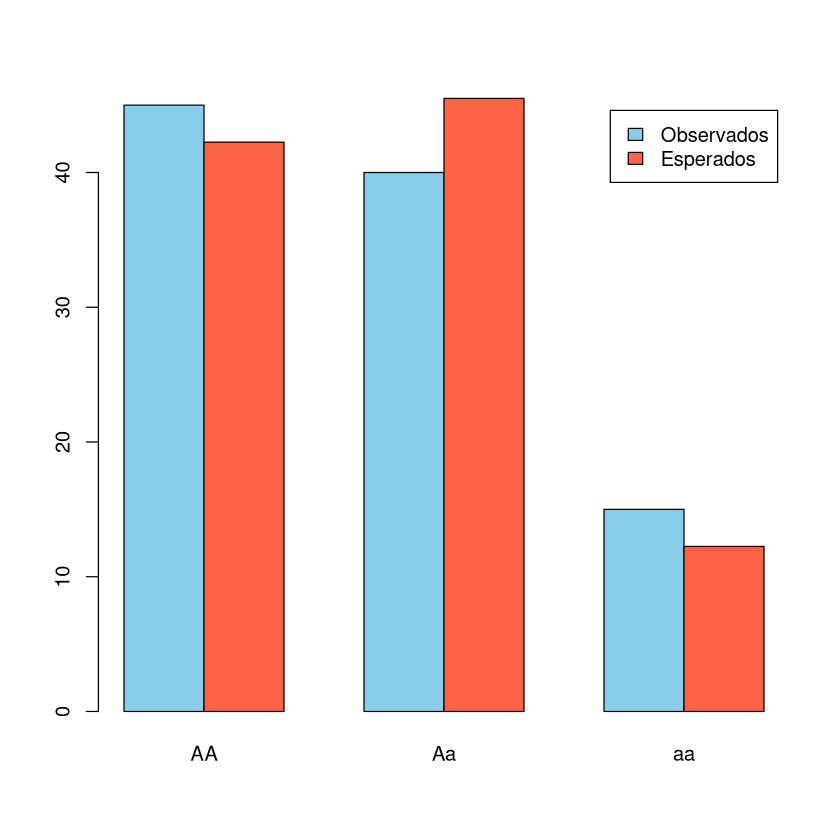

In [7]:
barplot(rbind(obs_counts, exp_counts),
        beside = TRUE, col = c("skyblue", "tomato"),
        names.arg = c("AA", "Aa", "aa"),
        legend = c("Observados", "Esperados"))